In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [3]:

transform=transforms.Compose([
    transforms.ToTensor(), #0->255 ==> [0,1)
    transforms.Normalize((0.5,), (0.5,)) #[0,1) ==> [-1,1]
])


train_data=datasets.MNIST(
    root='handwrittenDigitData',
    train=True,
    transform=transform,
    download=True
)
test_data=datasets.MNIST(
    root='handwrittenDigitData',
    train=False,
    transform=transform,
    download=True
)

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.15MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 126kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 872kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.08MB/s]


In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:

test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)
train_dataloader=DataLoader(train_data,batch_size=64,shuffle=True)
data_iter=iter(train_dataloader)
image,label=next(data_iter)

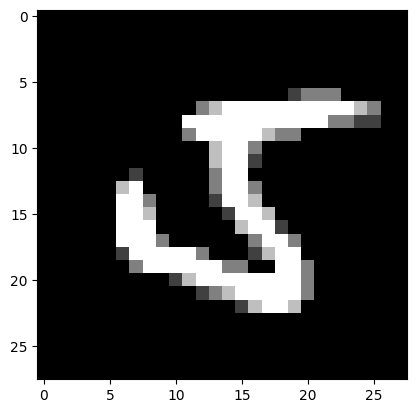

5


In [7]:
plt.imshow(image[0].squeeze(), cmap='gray')
plt.figsize=(2,2)
plt.show()
title=label[0].item()
print(title)

In [8]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    
    def forward(self,x):
        return self.network(x)

In [9]:
model=DigitsClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [11]:
running_loss=0.0
epochs=5
for epoch in range(epochs):
    for images,labels in train_dataloader:

        # Forward pass

        outputs=model(images)
        loss=criterion(outputs,labels)

        running_loss+=loss.item()

        # Backward pass and optimization

        optimizer.zero_grad() 
        loss.backward()

        #weight update

        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_dataloader)}")
    

Epoch 1/5, Loss: 0.3905246954268293
Epoch 2/5, Loss: 0.5818418993759574
Epoch 3/5, Loss: 0.7206999301227298
Epoch 4/5, Loss: 0.8343295890436784
Epoch 5/5, Loss: 0.9302139863161358


In [12]:
model.eval()

with torch.no_grad():
    correct=0
    total=0
    for images,labels in test_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
    print(f"Test Accuracy: {100*correct/total}%")

Test Accuracy: 96.38%


In [13]:
model.eval()

with torch.no_grad():
    correct=0
    total=0
    for images,labels in train_dataloader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
    
    print(f"Train Accuracy: {100*correct/total}%")

Train Accuracy: 97.27666666666667%
